In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

the dataset contain the data of red and white variants of wine quality, on the basis of the data we have to predict the quality of the wine on the basis of quality rate(wine quality) 7 or higher getting classified as good one,and the remainder are not good, the classes are not balanced and also we not sure if all input variables are relevant 

the data set contains the data like 
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality

In this dataset, I want to find out about the quality of the wine from the point of view of whether the quality has good, by using machine learning algorithms and my target variable is quality because i that dataset we want to predict the good quality. Quality is a continuous data, so it can be consume as continuous data. We Use various classification algorithms to get the higher accuracy

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The Data Has 1599 Rows And 12 Columns In That 12 Columns 1 is My Target Variable

In [3]:
df.value_counts

<bound method DataFrame.value_counts of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6   

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In This Data 0 Null Values Present

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<AxesSubplot:>

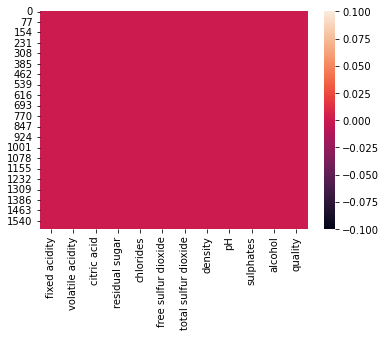

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.nunique().to_frame("no of unique values")

,no of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This gives the statistical information of the numerical column.

From the above description we can observe the following:
        
   1. The count of all the columns are same means there are no missing values
   2. The mean value is greater then the median in fixed acidity,residual sugar,free sulpher dioxide,total sulpher dioxide,means the data is skewed in right side
   3.The data in the column ph, means the data is skewed in left side
   4.we can observe there is a huge difference between 75% and max in some columns hence there are outlyers are present in the data

In [10]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

# univeriant analysis

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


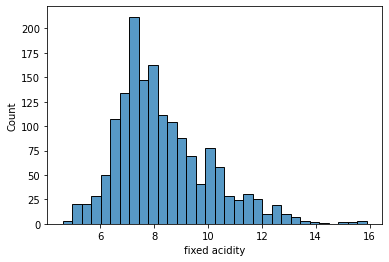

In [13]:
a=sns.histplot(x='fixed acidity',data=df)
print(df['fixed acidity'].value_counts())


very high number of counts in fixed acidity is 6 to 8

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


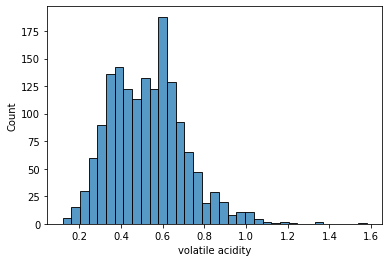

In [14]:
a=sns.histplot(x='volatile acidity',data=df)
print(df['fixed acidity'].value_counts())

in volatile acidity very high number od count in 0.6 to 0.7

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


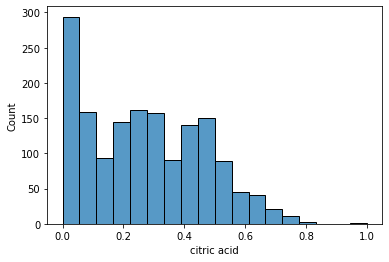

In [15]:
a=sns.histplot(x='citric acid',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


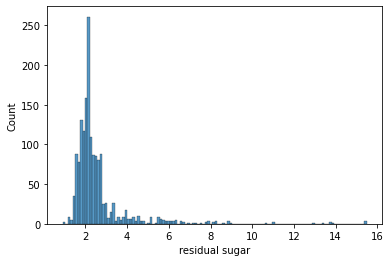

In [16]:
a=sns.histplot(x='residual sugar',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


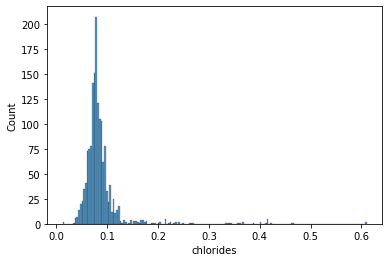

In [17]:
a=sns.histplot(x='chlorides',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


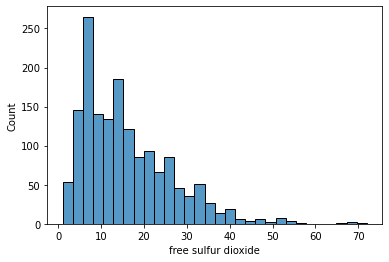

In [18]:
a=sns.histplot(x='free sulfur dioxide',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


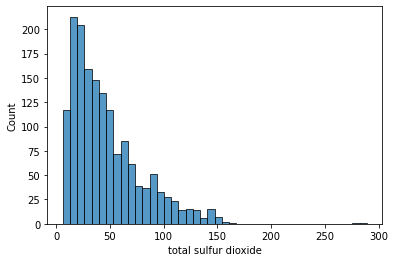

In [19]:
a=sns.histplot(x='total sulfur dioxide',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


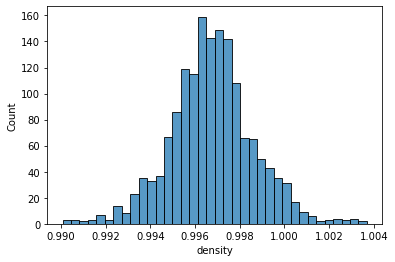

In [20]:
a=sns.histplot(x='density',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


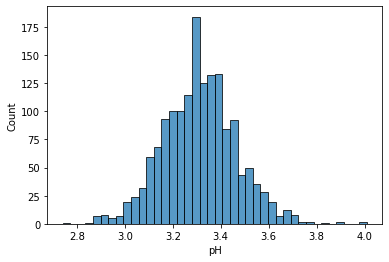

In [21]:
a=sns.histplot(x='pH',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


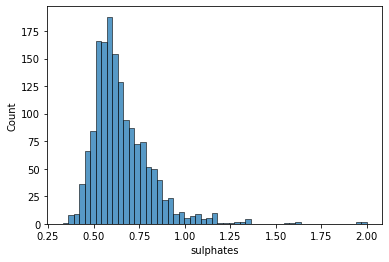

In [22]:
a=sns.histplot(x='sulphates',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


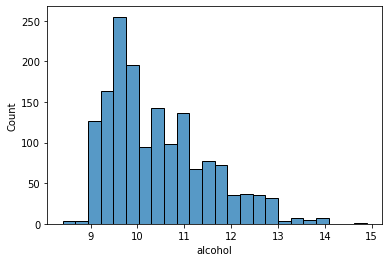

In [23]:
a=sns.histplot(x='alcohol',data=df)
print(df['fixed acidity'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


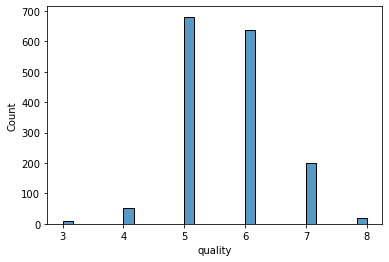

In [24]:
a=sns.histplot(x='quality',data=df)
print(df['fixed acidity'].value_counts())

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

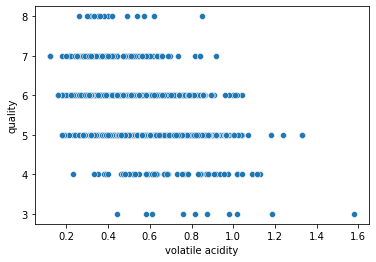

In [25]:
sns.scatterplot(x='volatile acidity',y='quality',data=df)


volatile acidity and quality are very less negatively corelated

<AxesSubplot:xlabel='residual sugar', ylabel='chlorides'>

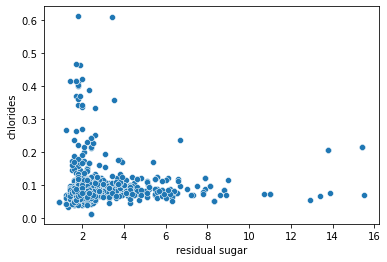

In [26]:
sns.scatterplot(x='residual sugar',y='chlorides',data=df)

Residual sugar and chlorides very less positively corelated with each other

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

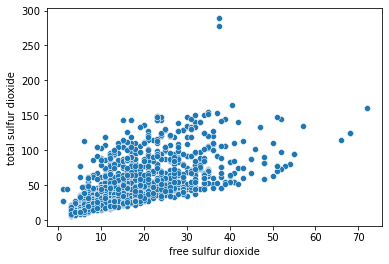

In [27]:
sns.scatterplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df)

Free sulfur dioxide and total sulfur dioxide highly positively corelaed with each other

<AxesSubplot:>

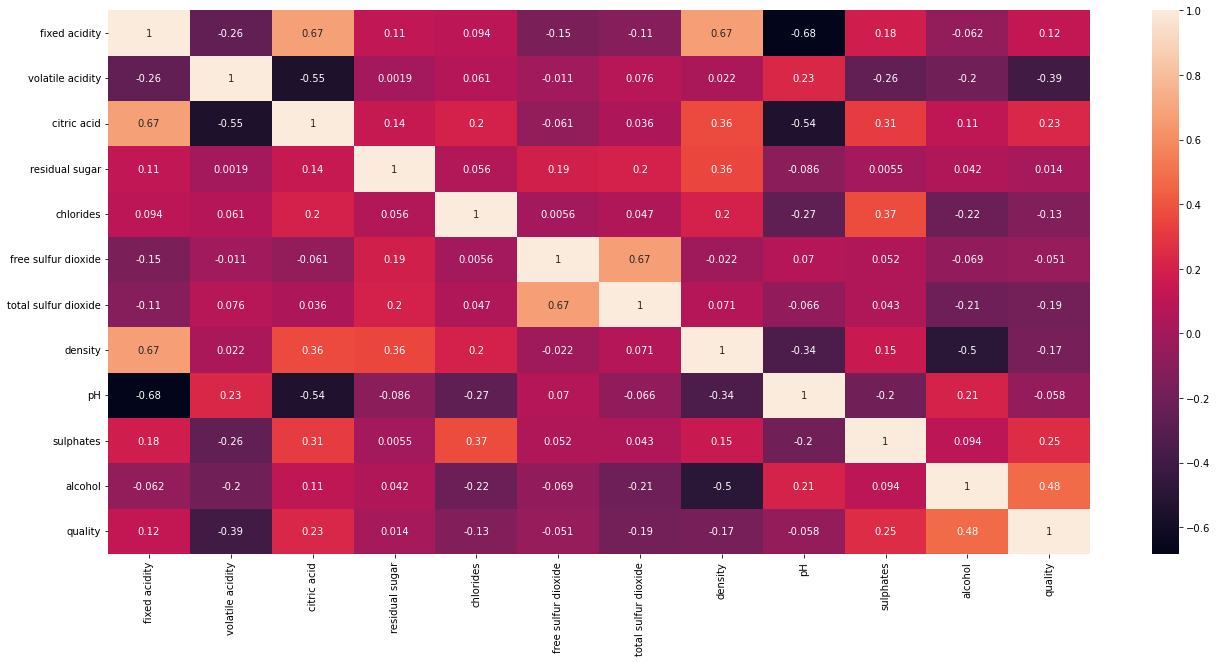

In [28]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True)

with the help of this heatmap we can see the data corelation with each other and get a decission instantly

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='density', ylabel='pH'>

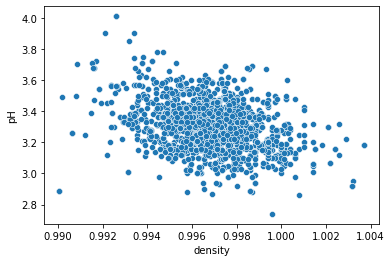

In [30]:
sns.scatterplot(x='density',y='pH',data=df)

Density and ph are very less negative corelated with each other

<AxesSubplot:xlabel='sulphates', ylabel='alcohol'>

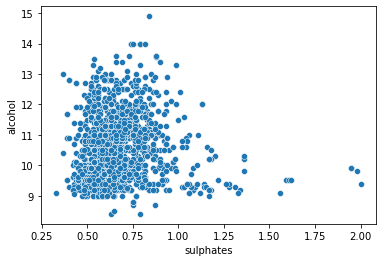

In [31]:
sns.scatterplot(x='sulphates',y='alcohol',data=df)

Sulphates and alcohol are positively correlated with each other 

# multivariant analysis

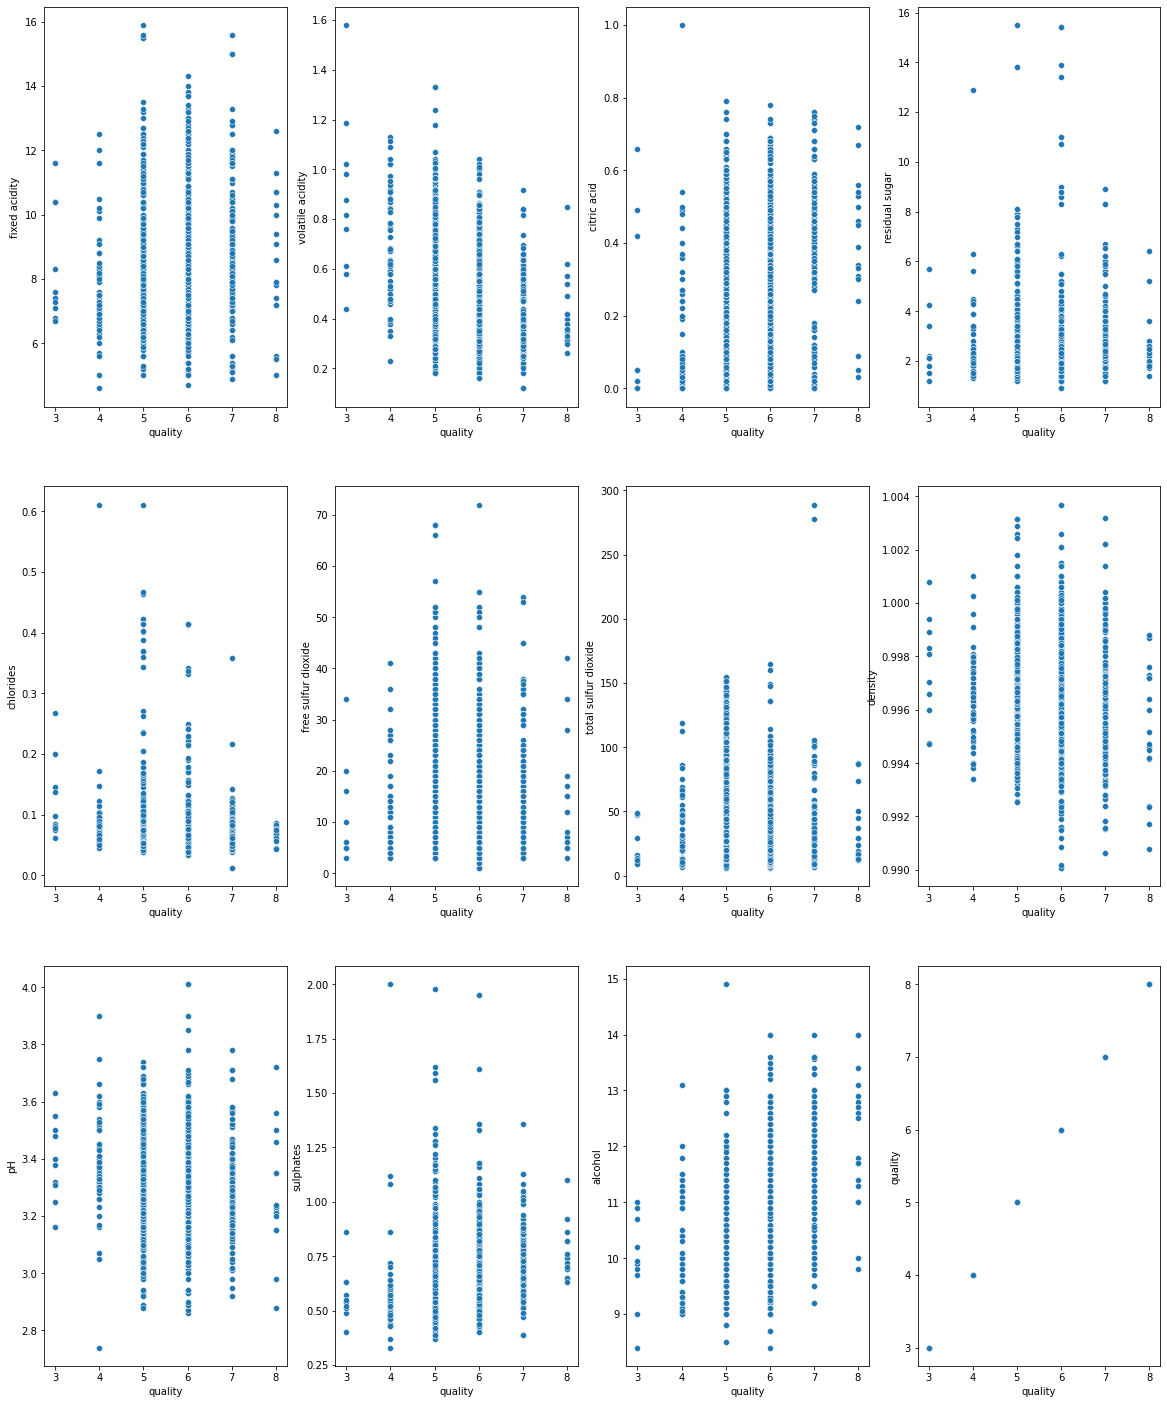

In [32]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(3,4,p)
        sns.scatterplot(x='quality',y=i,data=df)
        plt.xlabel('quality')
        plt.ylabel(i)
    p+=1
    
plt.show()

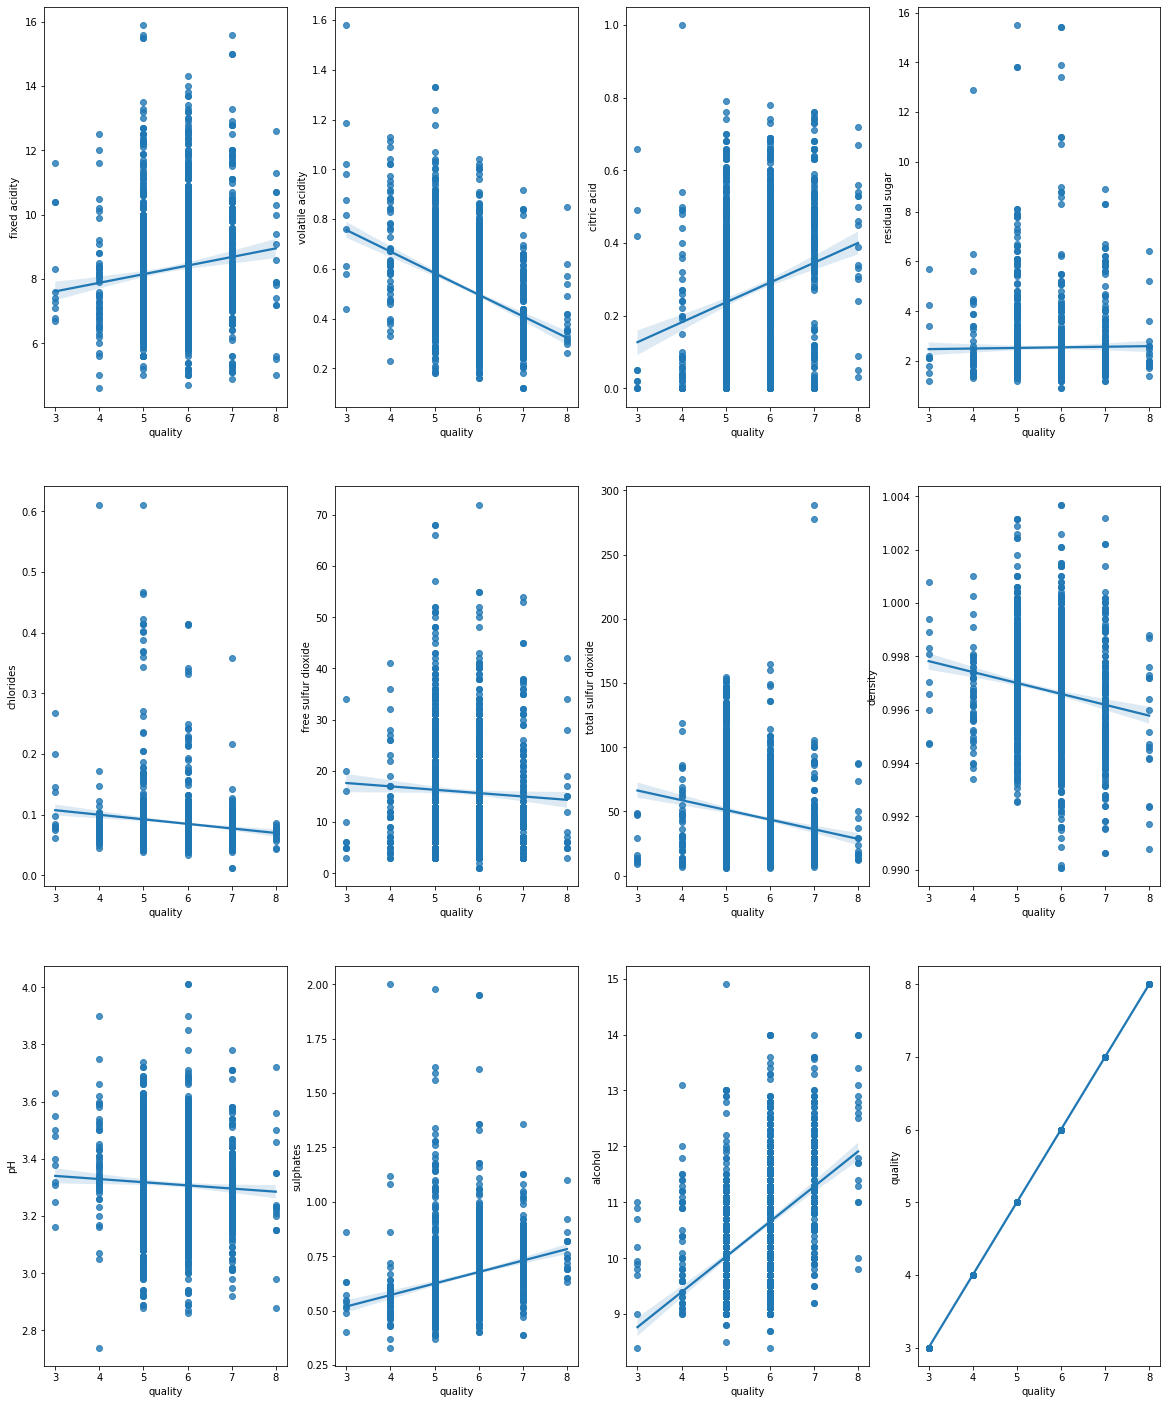

In [33]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(3,4,p)
        sns.regplot(x='quality',y=i,data=df)
        plt.xlabel('quality')
        plt.ylabel(i)
    p+=1
    
plt.show()

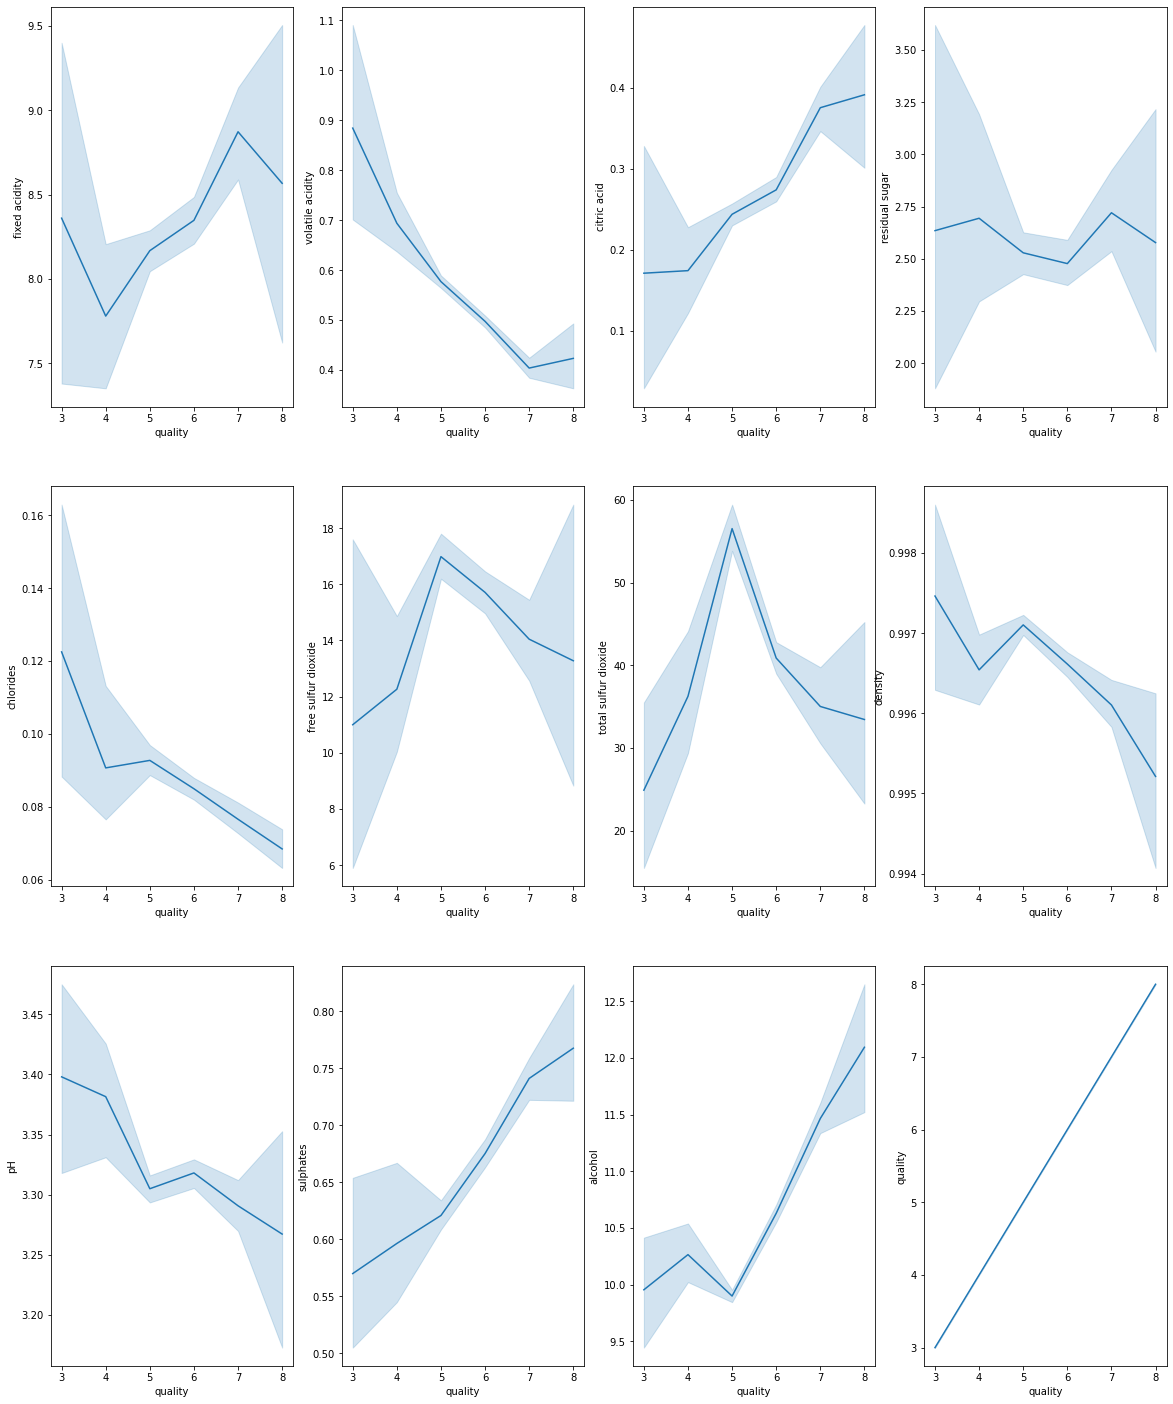

In [34]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(3,4,p)
        sns.lineplot(x='quality',y=i,data=df)
        plt.xlabel('quality')
        plt.ylabel(i)
    p+=1
    
plt.show()

# Removing Skewness

In [35]:
df.skew().to_frame('value')

,value
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,4.540655
chlorides,5.680347
free sulfur dioxide,1.250567
total sulfur dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


With the help of this code we can check the skewness in data frame,
fixed acidity , volatile acidity,residual sugar,chloride,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
all this columns have skewnwss firstly we can remove the skewness,with the help of Boxcox 

In [36]:
from scipy.stats import boxcox

In [37]:
df['fixed acidity']=boxcox(df['fixed acidity'],0)

In [38]:
df['volatile acidity']=boxcox(df['volatile acidity'],0)

In [39]:
df['residual sugar']=boxcox(df['residual sugar'],0)

In [40]:
df['chlorides']=boxcox(df['chlorides'],0)
df['free sulfur dioxide']=boxcox(df['free sulfur dioxide'],0)
df['total sulfur dioxide']=boxcox(df['total sulfur dioxide'],0)
df['sulphates']=boxcox(df['sulphates'],0)
df['alcohol']=boxcox(df['alcohol'],0)

In [41]:
df.skew()

fixed acidity           0.393915
volatile acidity       -0.434385
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.661856
quality                 0.217802
dtype: float64

so now my data is skewness free now we are going to detect the outlyers

fixed acidity              AxesSubplot(0.125,0.787927;0.352273x0.0920732)
volatile acidity        AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
citric acid                AxesSubplot(0.125,0.677439;0.352273x0.0920732)
residual sugar          AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
chlorides                  AxesSubplot(0.125,0.566951;0.352273x0.0920732)
free sulfur dioxide     AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
total sulfur dioxide       AxesSubplot(0.125,0.456463;0.352273x0.0920732)
density                 AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
pH                         AxesSubplot(0.125,0.345976;0.352273x0.0920732)
sulphates               AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
alcohol                    AxesSubplot(0.125,0.235488;0.352273x0.0920732)
quality                 AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

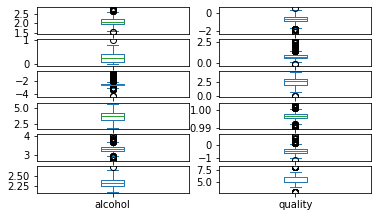

In [42]:
df.plot(kind='box',subplots=True,layout=(7,2))

With the help of boxplot we can see the outlyers are present in some columns now we can remove the outlyers with the help of Zscore

# Removing outlyers

In [43]:
from scipy.stats import zscore

In [44]:
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.485308,0.966823,1.391472,0.583150,0.218763,0.216380,0.105451,0.558274,1.288643,0.602062,0.994360,0.787823
1,0.221230,1.614051,1.391472,0.294627,0.558443,0.981997,0.856487,0.028261,0.719933,0.266658,0.572864,0.787823
2,0.221230,1.199415,1.186070,0.048478,0.365302,0.236350,0.550592,0.134264,0.331177,0.064774,0.572864,0.787823
3,1.593621,1.624702,1.484154,0.583150,0.259254,0.419050,0.700003,0.664277,0.979104,0.445052,0.572864,0.450848
4,0.485308,0.966823,1.391472,0.583150,0.218763,0.216380,0.105451,0.558274,1.288643,0.602062,0.994360,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.372847,0.530842,0.980669,0.439605,0.298111,1.342336,0.260175,0.978765,0.899886,0.445052,0.124960,0.787823
1595,1.621641,0.284750,0.877968,0.172877,0.841175,1.631100,0.469536,0.862162,1.353436,0.764320,0.777732,0.450848
1596,1.292584,0.071194,0.723916,0.048478,0.218763,1.198644,0.125016,0.533554,0.705508,0.705056,0.595484,0.450848
1597,1.621641,0.735385,0.775267,0.439605,0.259254,1.342336,0.260175,0.676657,1.677400,0.459825,0.168232,0.787823


In [45]:
threshold=3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   45,   81,   81,   83,   86,
         91,   92,   95,  106,  106,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  226,  226,  240,  243,  244,
        258,  258,  274,  281,  291,  324,  325,  339,  396,  400,  442,
        442,  451,  459,  467,  480,  480,  494,  517,  530,  535,  554,
        554,  555,  555,  557,  557,  566,  567,  568,  588,  595,  608,
        614,  639,  649,  652,  652,  652,  666,  690,  692,  695,  723,
        730,  754,  773,  776,  777,  821,  832,  836,  836,  837,  837,
        889,  899,  911,  917,  923,  948,  949,  950, 1017, 1018, 1043,
       1051, 1051, 1071, 1074, 1079, 1081, 1111, 1114, 1165, 1186, 1235,
       1244, 1260, 1269, 1269, 1270, 1270, 1286, 1299, 1299, 1300, 1316,
       1319, 1319, 1321, 1370, 1372, 1374, 1374, 1434, 1434, 1435, 1435,
       1469, 1474, 1474, 1476, 1476, 1478, 1505, 1558, 1566, 1570, 1574,
       1589], dtype=int64), array([ 9,  4,  9,  4,

In [46]:
df1=df[(z<3).all(axis=1)]

now here all the outlyers are removed and the data will be filtered but not ready for modeling firstly we can balanced the data and changed this data into standard data with the help of minmax scaler 

# Outlyers Removed

In [47]:
df1.value_counts

<bound method DataFrame.value_counts of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480         -0.356675         0.00        0.641854  -2.577022   
1          2.054124         -0.127833         0.00        0.955511  -2.322788   
2          2.054124         -0.274437         0.04        0.832909  -2.385967   
3          2.415914         -1.272966         0.56        0.641854  -2.590267   
4          2.001480         -0.356675         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594       1.824549         -0.510826         0.08        0.693147  -2.407946   
1595       1.774952         -0.597837         0.10        0.788457  -2.780621   
1596       1.840550         -0.673345         0.13        0.832909  -2.577022   
1597       1.774952         -0.438505         0.12        0.693147  -2.590267   
1598       1.791759         -1.171183         0.47        1.280934  -

In [48]:
df.value_counts

<bound method DataFrame.value_counts of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480         -0.356675         0.00        0.641854  -2.577022   
1          2.054124         -0.127833         0.00        0.955511  -2.322788   
2          2.054124         -0.274437         0.04        0.832909  -2.385967   
3          2.415914         -1.272966         0.56        0.641854  -2.590267   
4          2.001480         -0.356675         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594       1.824549         -0.510826         0.08        0.693147  -2.407946   
1595       1.774952         -0.597837         0.10        0.788457  -2.780621   
1596       1.840550         -0.673345         0.13        0.832909  -2.577022   
1597       1.774952         -0.438505         0.12        0.693147  -2.590267   
1598       1.791759         -1.171183         0.47        1.280934  -

# checking corelation between features and target

In [49]:
cor=df1.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297773,0.695969,0.208847,0.222379,-0.169906,-0.098006,0.671627,-0.720221,0.203032,-0.041086,0.143326
volatile acidity,-0.297773,1.000000,-0.593030,0.036996,0.124087,0.046242,0.121804,0.005568,0.249333,-0.344786,-0.217213,-0.371369
citric acid,0.695969,-0.593030,1.000000,0.191287,0.095096,-0.110411,-0.025045,0.385135,-0.530766,0.314388,0.155959,0.246821
residual sugar,0.208847,0.036996,0.191287,1.000000,0.206711,0.035190,0.114466,0.396683,-0.086721,0.097348,0.148249,0.050418
chlorides,0.222379,0.124087,0.095096,0.206711,1.000000,0.005957,0.110563,0.381878,-0.202690,0.010355,-0.253248,-0.156408
free sulfur dioxide,-0.169906,0.046242,-0.110411,0.035190,0.005957,1.000000,0.792150,-0.024948,0.129384,0.062028,-0.105402,-0.070315
total sulfur dioxide,-0.098006,0.121804,-0.025045,0.114466,0.110563,0.792150,1.000000,0.143856,0.021638,0.021070,-0.272948,-0.204826
density,0.671627,0.005568,0.385135,0.396683,0.381878,-0.024948,0.143856,1.000000,-0.321326,0.165364,-0.455996,-0.157541
pH,-0.720221,0.249333,-0.530766,-0.086721,-0.202690,0.129384,0.021638,-0.321326,1.000000,-0.048456,0.145220,-0.085664
sulphates,0.203032,-0.344786,0.314388,0.097348,0.010355,0.062028,0.021070,0.165364,-0.048456,1.000000,0.236454,0.384854


In [50]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.496355
sulphates               0.384854
citric acid             0.246821
fixed acidity           0.143326
residual sugar          0.050418
free sulfur dioxide    -0.070315
pH                     -0.085664
chlorides              -0.156408
density                -0.157541
total sulfur dioxide   -0.204826
volatile acidity       -0.371369
Name: quality, dtype: float64

with the help of this code we can see the corelation between the target variable and independent variables in desending order 

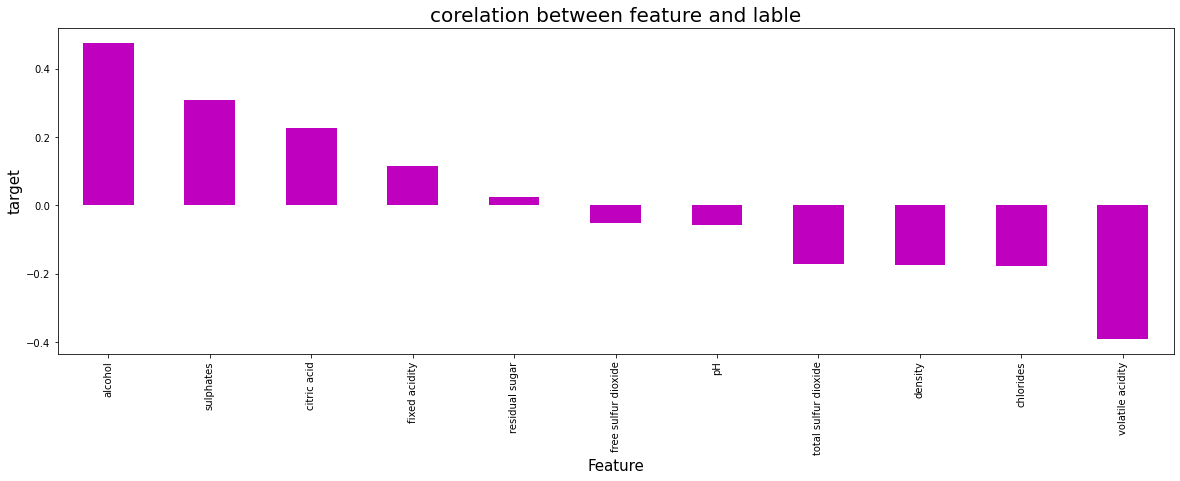

In [51]:
plt.figure(figsize=(20,6))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize= 15)
plt.ylabel('target',fontsize= 15)
plt.title('corelation between feature and lable',fontsize=20)
plt.show()

positiv and negative corelation between features and target.here the feature residual sugar have very less correlation with the column

# seperating features and label

In [52]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]


we can seperate the features and label for data modeling

In [53]:
columns = x.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [54]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710


In [55]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# feature scaling using standard scalarization

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
#st=MinMaxScaler()
#x=st.fit_transform(x)
#x=pd.DataFrame(data=x,columns=columns)
#x

st = MinMaxScaler()
x = st.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.373081,0.679069,0.000000,0.267203,0.398889,0.508895,0.523387,0.600000,0.730337,0.404466,0.233435
1,0.423179,0.793492,0.000000,0.449585,0.545195,0.753970,0.728062,0.509091,0.382022,0.552958,0.319922
2,0.423179,0.720189,0.050633,0.378296,0.508837,0.601481,0.662976,0.527273,0.449438,0.518449,0.319922
3,0.767472,0.220919,0.708861,0.267203,0.391267,0.638844,0.694766,0.618182,0.337079,0.431304,0.319922
4,0.373081,0.679069,0.000000,0.267203,0.398889,0.508895,0.523387,0.600000,0.730337,0.404466,0.233435
...,...,...,...,...,...,...,...,...,...,...,...
1478,0.204708,0.601993,0.101266,0.297029,0.496189,0.827662,0.601182,0.336364,0.662921,0.431304,0.463109
1479,0.157510,0.558487,0.126582,0.352448,0.281723,0.886716,0.645729,0.356364,0.741573,0.638025,0.597051
1480,0.219934,0.520733,0.164557,0.378296,0.398889,0.798276,0.572424,0.412727,0.629213,0.627895,0.559656
1481,0.157510,0.638154,0.151899,0.297029,0.391267,0.827662,0.601182,0.388182,0.797753,0.585977,0.402949


now our data has been standard and reefined

# checking variance inflation factor(VIF)

In [58]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710,5
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,2.282382,5
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,2.282382,5
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,2.282382,6
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,-0.510826,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,2.351375,5
1595,1.774952,-0.597837,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,2.415914,6
1596,1.840550,-0.673345,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,2.397895,6
1597,1.774952,-0.438505,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,2.322388,5


In [60]:
x.shape[1]

11

In [61]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,48.188037,0
1,15.997609,1
2,9.150471,2
3,10.294543,3
4,12.847248,4
5,26.121858,5
6,25.637827,6
7,73.449294,7
8,24.256107,8
9,14.872241,9


with the help of this code we can check the VIF value of the data if the VIF value is very high we can drop the column and again check the VIF values
_________________density column has very high VIF value so we can drop it

In [62]:
x = x.drop([7], axis=1)


In [63]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,18.524017,0
1,15.841592,1
2,9.135006,2
3,6.914223,3
4,12.693892,4
5,25.703656,5
6,25.379085,6
7,15.460068,8
8,13.923276,9
9,7.945227,10


Again Free sulfur dioxide has very high VIF value so we can drop it

In [64]:
x = x.drop([5], axis=1)

In [65]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,18.134043,0
1,15.546320,1
2,8.828652,2
3,6.866182,3
4,12.693779,4
5,8.206583,6
6,14.908538,8
7,13.867589,9
8,7.606320,10


In [66]:
x = x.drop([0], axis=1)

In [67]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,12.313377,1
1,5.013260,2
2,6.810662,3
3,11.924480,4
4,8.161097,6
5,13.123186,8
6,12.806886,9
7,7.602689,10


In [68]:
y.value_counts()

5    642
6    591
7    184
4     50
8     16
Name: quality, dtype: int64

In [69]:
import sklearn
sklearn.__version__

'1.0.2'

In [70]:
import numpy
numpy.__version__

'1.21.5'

now we use over sampling method for balanced the data because data is not balanced

In [71]:
!pip install imbalanced-learn

In [72]:
from imblearn.over_sampling import SMOTE
st=SMOTE()
x,y=st.fit_resample(x,y)

In [73]:
y.value_counts()

5    642
6    642
7    642
4    642
8    642
Name: quality, dtype: int64

# Now we go for data modelling

# Finding the best random state

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('best accuracy is:', maxAccu, 'at random_state', maxRs)

best accuracy is: 0.881619937694704 at random_state 110


In [75]:
df1.shape

(1483, 12)

# Creating Train Test Split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = maxRs)

# Classification Algorithums

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
mnb= MultinomialNB()
dtc= DecisionTreeClassifier()
svm=SVC()
knn=KNeighborsClassifier()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
model=[mnb,dtc,svm,knn,RFC,ETC]

for M in model:
    M.fit(x_train,y_train)
    pred=M.predict(x_test)
    print('accuracy score of ',M,'is',)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(M,x,y,cv=5)
    print(score)
    print(score.mean())
    print('difference between and cross validation score is',accuracy_score(y_test,pred) - score.mean())
    print("\n")

accuracy score of  MultinomialNB() is
0.48390446521287644
[[122  29  43   5   0]
 [ 48  68  66   0  10]
 [ 30  17  82   6  31]
 [ 26   0  60  40  77]
 [  0   0  37  12 154]]
              precision    recall  f1-score   support

           4       0.54      0.61      0.57       199
           5       0.60      0.35      0.44       192
           6       0.28      0.49      0.36       166
           7       0.63      0.20      0.30       203
           8       0.57      0.76      0.65       203

    accuracy                           0.48       963
   macro avg       0.52      0.48      0.47       963
weighted avg       0.53      0.48      0.47       963

[0.45482866 0.45327103 0.47819315 0.42367601 0.41588785]
0.4451713395638629
difference between and cross validation score is 0.038733125649013544


accuracy score of  DecisionTreeClassifier() is
0.7808930425752856
[[165  22  11   1   0]
 [ 11 137  35   8   1]
 [  9  29  99  24   5]
 [  2   8  22 161  10]
 [  0   1   2  10 190]]
       

with all this machine learning algorithums Extra tree classifier gives 86% accuracy score this score is very high compare to others algorithums we can select it and use Hyper parameter tuning to increase more accuracy 

# Hyper Parametyer Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters = {'criterion':['gini', 'entropy'],
             'n_estimators':[50,100,200,350],
             'max_depth':[0,10,20,30],
             'random_state':[10,50,1000]}

In [82]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 350],
                         'random_state': [10, 50, 1000]})

In [84]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 350, 'random_state': 10}

In [85]:
final= ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=350, random_state=10)
final.fit(x_train,y_train)
pred= final.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

88.1619937694704


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {'criterion':['gini', 'entropy'],
             'n_estimators':[50,100,200,325,350],
             'max_depth':[0,10,20,30],
             'random_state':[10,50,1000]}
RS=RandomizedSearchCV(ExtraTreesClassifier(),parameters,cv=5)
RS.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 10, 20, 30],
                                        'n_estimators': [50, 100, 200, 350],
                                        'random_state': [10, 50, 1000]})

In [87]:
final_1=ExtraTreesClassifier(random_state=10, n_estimators=325, max_depth=20, criterion='gini')
final_1.fit(x_train,y_train)
pred_1= final_1.predict(x_test)
acc = accuracy_score(y_test, pred_1)
print(acc*100)

87.95430944963655


After hyper parameter tuning my model get more accurated the accuracy is increase 86% to 88% 

# Saving the model using .pkl

In [88]:
import joblib
joblib.dump(final_1,'Wine Quality Analysis.pkl')

['Wine Quality Analysis.pkl']

predicting the save model

In [89]:
model = joblib.load('Wine Quality Analysis.pkl')
prediction = model.predict(x_test)
prediction

array([4, 4, 5, 8, 6, 7, 7, 7, 4, 7, 5, 8, 5, 5, 4, 7, 7, 8, 5, 5, 5, 4,
       5, 8, 4, 6, 4, 4, 7, 8, 7, 5, 7, 5, 8, 8, 4, 7, 8, 4, 8, 5, 5, 8,
       5, 8, 5, 8, 8, 5, 8, 5, 5, 7, 5, 6, 8, 6, 6, 4, 8, 7, 5, 7, 8, 8,
       4, 8, 6, 6, 8, 8, 4, 7, 7, 5, 4, 6, 5, 7, 8, 8, 6, 6, 7, 7, 6, 6,
       5, 4, 6, 4, 7, 4, 6, 4, 7, 8, 7, 6, 5, 7, 4, 5, 7, 6, 5, 7, 5, 7,
       8, 8, 7, 6, 5, 6, 5, 4, 6, 4, 4, 4, 4, 8, 8, 8, 8, 7, 8, 8, 7, 4,
       8, 7, 8, 6, 4, 5, 6, 6, 4, 5, 4, 8, 8, 5, 5, 4, 4, 4, 4, 5, 5, 5,
       5, 4, 5, 6, 4, 7, 5, 6, 8, 8, 8, 4, 4, 8, 6, 7, 7, 7, 7, 4, 5, 6,
       8, 4, 7, 5, 4, 4, 8, 5, 4, 8, 5, 4, 8, 5, 5, 5, 4, 5, 8, 5, 4, 6,
       8, 7, 8, 4, 6, 4, 4, 5, 6, 7, 4, 4, 7, 4, 4, 4, 7, 6, 7, 7, 6, 8,
       4, 4, 6, 5, 5, 4, 5, 5, 5, 5, 8, 5, 5, 5, 7, 4, 8, 7, 8, 5, 8, 4,
       6, 6, 8, 4, 4, 7, 5, 6, 5, 6, 4, 8, 4, 6, 5, 6, 4, 5, 4, 4, 6, 7,
       8, 8, 8, 8, 5, 4, 8, 7, 7, 5, 4, 5, 4, 8, 7, 8, 8, 6, 7, 4, 7, 5,
       5, 7, 7, 8, 7, 6, 6, 7, 7, 7, 7, 4, 7, 7, 7,

these are the predicted wine quality values

In [90]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = prediction
df['original'] = a
df

,predicted,original
0,4,4
1,4,4
2,5,5
3,8,8
4,6,5
...,...,...
958,8,8
959,8,8
960,6,6
961,7,7


# In that dataset accuracy is 88% 